Libraries and dataset imports and dataframe setup

In [1]:
import pandas as pd #import pandas lib   
import matplotlib as plt #import matplotlib lib
import seaborn as sns #import seaborn lib
from sklearn.preprocessing import LabelEncoder as Enc #import LabelEncoder
from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.linear_model import LogisticRegression #import LogisticRegression model
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve #import performance measuring fonctions
from sklearn import metrics #import metrics
%matplotlib inline

pd.options.display.float_format = "{:,.2f}".format

tpass = pd.read_csv("/home/shenpai/Documents/DEVGURU/Python/GMC/titanic-passengers.csv",sep = ";") #import dataset from a csv file
tpass.sort_values("PassengerId",axis = 0,inplace = True) #sort the dataframe by PassengerId
tpass.set_index("PassengerId",inplace = True) #set PassengerId as index

Head of the dataset

In [2]:
tpass.head() #display head of dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,No,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,Yes,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,No,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


General informations about the dataset

In [3]:
tpass.info() #display general information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 83.5+ KB


Finding columns with missing dat

In [4]:
tpass.isnull().sum() #summary of the dataset columns with missing or NaN values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Both of Age and Embarked columns contain a reasonable amount of missing data that will be filled next. Whereas Cabin column contains too many of them therefore it will be droped later.

Filling missing  data

In [5]:
tpass["Embarked"].fillna(tpass["Embarked"].mode()[0],inplace = True) #fill Embarked missing values with the most commun value in the column

In [6]:
tpass["Age"].fillna(tpass["Age"].mean(),inplace = True) #fill missing Age values with the mean of the column

Age Distribution

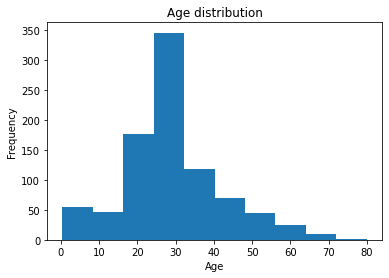

In [7]:
plt.pyplot.title("Age distribution") #plot title
plt.pyplot.xlabel("Age") #plot x axis label
tpass["Age"].plot.hist() #histogram of Age

Most of the passengers were aged between 18 and 30.

Sex Distribution

Text(0.5, 1.0, 'Sex Distribution')

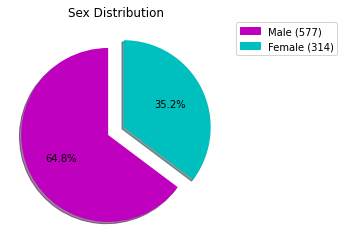

In [8]:
malep = (len(tpass[tpass["Sex"] == "male"])/len(tpass["Sex"])) * 100 #percentage of males
femalep = (len(tpass[tpass["Sex"] == "female"])/len(tpass["Sex"])) * 100 #percentage of females

labm = "Male ("+str(len(tpass[tpass["Sex"] == "male"])) + ")" #male number label
labf = "Female ("+str(len(tpass[tpass["Sex"] == "female"])) + ")" #female number label

ppsex = plt.pyplot.subplot(1,1,1) #plot reference
ppsex.pie([malep,femalep],explode = (0.1,0.1),autopct = "%1.1f%%",shadow = True,startangle = 90,colors = ["m","c"]) #sex distribution plot
ppsex.legend(bbox_to_anchor = (1.05, 1), loc = "upper left", borderaxespad = 0.,handles = [plt.patches.Patch(color = "m", label = labm),plt.patches.Patch(color = "c",label = labf)]) #plot legend
ppsex.set_title("Sex Distribution") #plot title

Most of the passengers were males with a percentage of 64.8% (577 out of 891)

Passengers survival rates

Text(0.5, 1.0, 'Survivale rates')

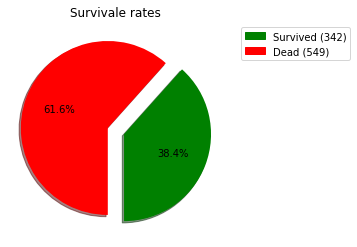

In [9]:
sur = (len(tpass[tpass["Survived"] == "Yes"])/len(tpass["Survived"])) * 100 #percentage surviving passengers
dead = (len(tpass[tpass["Survived"] == "No"])/len(tpass["Survived"])) * 100 #percentage of dead passengers

labs = "Survived ("+str(len(tpass[tpass["Survived"] == "Yes"])) + ")" #survived number label
labd = "Dead ("+str(len(tpass[tpass["Survived"] == "No"])) + ")" #dead number label

ppsur = plt.pyplot.subplot(1,1,1) #subplot reference
ppsur.pie([sur,dead],explode = (0.1,0.1),autopct = "%1.1f%%",shadow = True,startangle = 270,colors = ["g","r"]) #survival rates plot
ppsur.legend(bbox_to_anchor = (1.05, 1), loc = "upper left",handles = [plt.patches.Patch(color = "g", label = labs),plt.patches.Patch(color = "r",label = labd)]) #plot legend
ppsur.set_title("Survivale rates") #plot title

The majority of passengers didn't make it (61.6%)

Impact of Age and Sex on Survival

Text(0.5, 1.0, 'Impact of Age and Sex on Survival')

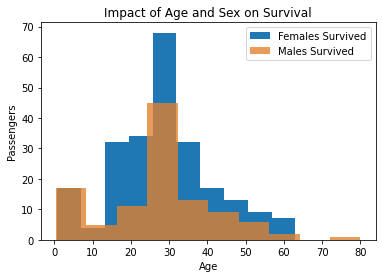

In [10]:
corrsas = plt.pyplot.subplot(1,1,1) #plot reference
corrsas.hist(tpass["Age"][(tpass["Sex"] == "female") & (tpass["Survived"] == "Yes")]) #histogram of females that survived
corrsas.hist(tpass["Age"][(tpass["Sex"] == "male") & (tpass["Survived"] == "Yes")],color = "#E1812C",alpha = .78) #histogram of males that survived
plt.pyplot.xlabel("Age") #x axis label
plt.pyplot.ylabel("Passengers") #y axis label
plt.pyplot.legend(["Females Survived","Males Survived"]) #custom legend
corrsas.set_title("Impact of Age and Sex on Survival") #plot title

The number of females that survived the crash is higher than the number of males.
The majority of the surviving females were aged between 25 and 30.
The majority of the surviving males were aged between 25 and 32.

Impact of Pclass on Survival

Text(0.5, 0.98, 'Impact of Class on Survival')

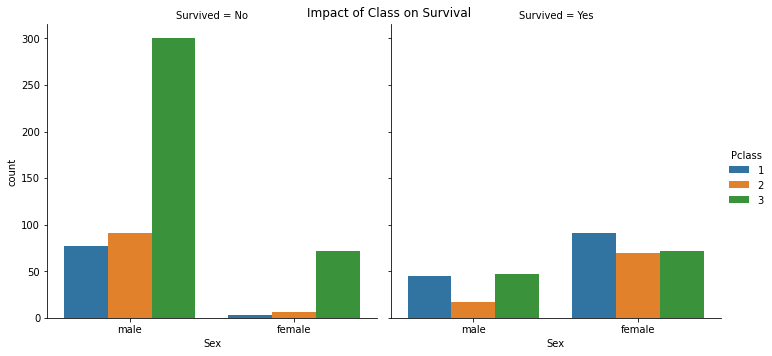

In [11]:
giclass = sns.catplot("Sex", col = "Survived", hue = "Pclass", data = tpass, kind = "count")
giclass.fig.suptitle("Impact of Class on Survival")

Most of the passengers that didn't make it were Pclass of 3 for both males and females.
Most of surviving passengers were Pclass 1 in both cases.

Impact of Parch on Survival

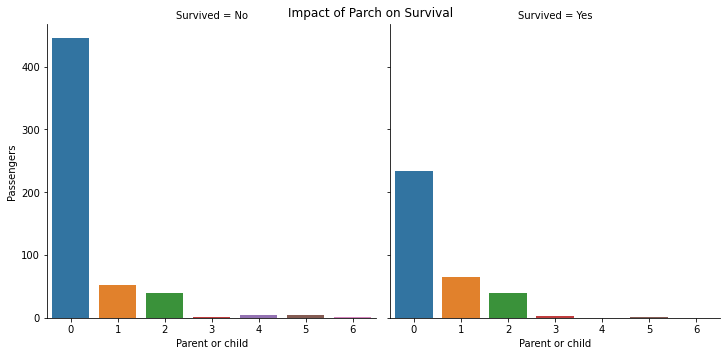

In [12]:
giparch = sns.catplot('Parch', col = 'Survived', data = tpass, kind = "count") #catplot of specified columns
giparch.fig.suptitle("Impact of Parch on Survival") #plot title
giparch.set_xlabels("Parent or child") #x axis label
giparch.set_ylabels("Passengers") #y axis label

The majority of passengers had no parents or children with them which explains the high counts of passengers with 0 Parch in both servival and dead scenarios.

Dropping useless columns

In [13]:
tpass.drop(columns = ["Name","Ticket","Embarked", "Cabin"],axis = 1,inplace=True) #drop useless columns

Feature transformation

In [14]:
tpass.Sex = Enc().fit_transform(tpass.Sex) #Sex transformation

tpass.Survived = Enc().fit_transform(tpass.Survived)

Applying Logistic Regression

In [15]:
x = tpass[["Sex", "Pclass", "Age",  "Parch", "Fare"]] #feature selection
y = tpass["Survived"] #target selection

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40) #defining train set and test set

LogReg = LogisticRegression() 
LogReg.fit(x_train, y_train)  #fitting training data
y_pred  = LogReg.predict(x_test)    #testing model’s performance
print(f"Accuracy = {LogReg.score(x_test, y_test):.3f}") #displaying the model's accuracy

Accuracy = 0.821


The logistic regression model was partially successful in predicting the survival of passengers with an accuracy of 82.1%.

Confusion matrix

In [16]:
conf_mat = pd.crosstab(y_test, y_pred, rownames =  ['Actual'], colnames = ['Predicted'], margins = True)
print(conf_mat)

Predicted    0   1  All
Actual                 
0           88  15  103
1           17  59   76
All        105  74  179


The test set had a total of 179 entries, 76 of them did survive and the other 103 didn't.
Out of the 76 entries, our model predicted 59 correctly (TP) and 17 incorrectly (FP). Whereas out of the 103 remaining, it predicted 88 correctly (TN) and 15 incorrectly (FN).

ROC and AUC metrics

ROC and AUC curves are important evaluation metrics for calculating the performance of any classification model.

1) ROC (Receiver Operating Characteristic), is a graphical plot which illustrates the performance of a classifier system at different classification thresholds. It is created by plotting the TPR vs. the FPR at various threshold settings.

2) AUC (Area Under the Curve), measures the area underneath the entire ROC curve from (0,0) to (1,1). It provides an aggregate measure of performance across all possible classification thresholds.  The closer the score to 1 the better the model distinguishes the clasess

ROC and AUC can be used to compare different models or the same models with different parameters in order to determine the best of them

Applying ROC and AUC in our case

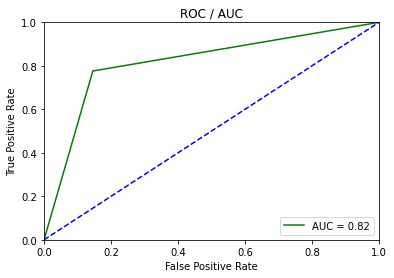

In [17]:
fpr, tpr, threshold = roc_curve (y_test, y_pred) #getting FPR, TPR and thresholds
roc_auc = metrics.auc(fpr, tpr) #getting AUC value

plt.pyplot.title('ROC / AUC') #plot title
plt.pyplot.plot(fpr, tpr, 'g', label = f'AUC = {roc_auc:.2f}') #plotting ROC curve
plt.pyplot.legend(loc = 'lower right') #setting up the legend location
plt.pyplot.plot([0, 1], [0, 1],'b--')
plt.pyplot.xlim([0, 1]) #setting up x axis limits
plt.pyplot.ylim([0, 1]) # setting up y axis limits
plt.pyplot.xlabel('False Positive Rate') #setting up x axis label
plt.pyplot.ylabel('True Positive Rate') #setting up y axis label
plt.pyplot.show()


We can see that that the value of AUC here is 0.82 which confirms the that probability of our model correctly classifying passengers is of 82%.

On the other hand, the ROC curve can helps determine, with a little more calculations, the optimal threshold taking into consideration the trade-off between TPRs and FPRs (highest TPR and lowest FPR)